# MobileNet Model

### <u>Action Classes - 20</u>

In [1]:
from keras import models
from keras.layers import Dense,Flatten
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import mobilenet

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-08-25 19:35:53.577594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 19:35:53.679746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 19:35:53.680075: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "./frames/"
# will contain the categories in respective folders

# Data generators
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)


In [4]:
image_size = (224,224)
batch_size = 10

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training"
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

Found 5118 images belonging to 20 classes.
Found 1270 images belonging to 20 classes.
Found 1270 images belonging to 20 classes.


In [5]:
train_batches.class_indices

{'ApplyLipstick': 0,
 'Archery': 1,
 'BabyCrawling': 2,
 'Basketball': 3,
 'Biking': 4,
 'Diving': 5,
 'Fencing': 6,
 'IceDancing': 7,
 'Kayaking': 8,
 'MilitaryParade': 9,
 'PizzaTossing': 10,
 'PullUps': 11,
 'ShavingBeard': 12,
 'SkateBoarding': 13,
 'SumoWrestling': 14,
 'Surfing': 15,
 'TennisSwing': 16,
 'Typing': 17,
 'WritingOnBoard': 18,
 'YoYo': 19}

In [6]:
from matplotlib import pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1,10)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

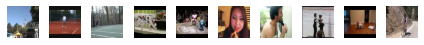

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
imgs, labels = train_batches[0]
plot_images(imgs)
print(labels[:10])

## Initialize model

In [8]:
mobilenet_model_top = mobilenet.MobileNet(include_top=True,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')

for (i,layer) in enumerate(mobilenet_model_top.layers):
    print((i, layer.name, layer.output_shape))

2022-08-25 19:35:54.974822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 19:35:54.975841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 19:35:54.976473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 19:35:54.976814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

(0, 'input_1', [(None, 224, 224, 3)])
(1, 'conv1', (None, 112, 112, 32))
(2, 'conv1_bn', (None, 112, 112, 32))
(3, 'conv1_relu', (None, 112, 112, 32))
(4, 'conv_dw_1', (None, 112, 112, 32))
(5, 'conv_dw_1_bn', (None, 112, 112, 32))
(6, 'conv_dw_1_relu', (None, 112, 112, 32))
(7, 'conv_pw_1', (None, 112, 112, 64))
(8, 'conv_pw_1_bn', (None, 112, 112, 64))
(9, 'conv_pw_1_relu', (None, 112, 112, 64))
(10, 'conv_pad_2', (None, 113, 113, 64))
(11, 'conv_dw_2', (None, 56, 56, 64))
(12, 'conv_dw_2_bn', (None, 56, 56, 64))
(13, 'conv_dw_2_relu', (None, 56, 56, 64))
(14, 'conv_pw_2', (None, 56, 56, 128))
(15, 'conv_pw_2_bn', (None, 56, 56, 128))
(16, 'conv_pw_2_relu', (None, 56, 56, 128))
(17, 'conv_dw_3', (None, 56, 56, 128))
(18, 'conv_dw_3_bn', (None, 56, 56, 128))
(19, 'conv_dw_3_relu', (None, 56, 56, 128))
(20, 'conv_pw_3', (None, 56, 56, 128))
(21, 'conv_pw_3_bn', (None, 56, 56, 128))
(22, 'conv_pw_3_relu', (None, 56, 56, 128))
(23, 'conv_pad_4', (None, 57, 57, 128))
(24, 'conv_dw_4', (No

In [9]:
mobilenet_model = mobilenet.MobileNet(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=20,
                   weights='imagenet')

for (i,layer) in enumerate(mobilenet_model.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape))

(0, 'input_2', [(None, 224, 224, 3)])
(1, 'conv1', (None, 112, 112, 32))
(2, 'conv1_bn', (None, 112, 112, 32))
(3, 'conv1_relu', (None, 112, 112, 32))
(4, 'conv_dw_1', (None, 112, 112, 32))
(5, 'conv_dw_1_bn', (None, 112, 112, 32))
(6, 'conv_dw_1_relu', (None, 112, 112, 32))
(7, 'conv_pw_1', (None, 112, 112, 64))
(8, 'conv_pw_1_bn', (None, 112, 112, 64))
(9, 'conv_pw_1_relu', (None, 112, 112, 64))
(10, 'conv_pad_2', (None, 113, 113, 64))
(11, 'conv_dw_2', (None, 56, 56, 64))
(12, 'conv_dw_2_bn', (None, 56, 56, 64))
(13, 'conv_dw_2_relu', (None, 56, 56, 64))
(14, 'conv_pw_2', (None, 56, 56, 128))
(15, 'conv_pw_2_bn', (None, 56, 56, 128))
(16, 'conv_pw_2_relu', (None, 56, 56, 128))
(17, 'conv_dw_3', (None, 56, 56, 128))
(18, 'conv_dw_3_bn', (None, 56, 56, 128))
(19, 'conv_dw_3_relu', (None, 56, 56, 128))
(20, 'conv_pw_3', (None, 56, 56, 128))
(21, 'conv_pw_3_bn', (None, 56, 56, 128))
(22, 'conv_pw_3_relu', (None, 56, 56, 128))
(23, 'conv_pad_4', (None, 57, 57, 128))
(24, 'conv_dw_4', (No

In [10]:
model = models.Sequential()

dense_layer_1 = Dense(32, activation='relu')
dense_layer_2 = Dense(32, activation='relu')
dense_layer_2 = Dense(32, activation='relu')
prediction_layer = Dense(20, activation='softmax')

model.add(mobilenet_model)
model.add(dense_layer_1)
model.add(dense_layer_2)
model.add(prediction_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 20)                660       
                                                                 
Total params: 3,263,380
Trainable params: 34,516
Non-trainable params: 3,228,864
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.save("./models/action-class-20-model-mobilenet.h5")

In [13]:
fit = model.fit(train_batches, epochs=20, validation_data=validation_batches)

Epoch 1/20


2022-08-25 19:36:01.438879: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-25 19:36:02.831912: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


512/512 [==============================] - 65s 117ms/step - loss: 0.9352 - accuracy: 0.7386 - val_loss: 0.5429 - val_accuracy: 0.8087
Epoch 2/20
512/512 [==============================] - 18s 34ms/step - loss: 0.1710 - accuracy: 0.9547 - val_loss: 0.5272 - val_accuracy: 0.8417
Epoch 3/20
512/512 [==============================] - 18s 35ms/step - loss: 0.0727 - accuracy: 0.9867 - val_loss: 0.4083 - val_accuracy: 0.8685
Epoch 4/20
512/512 [==============================] - 18s 35ms/step - loss: 0.0401 - accuracy: 0.9916 - val_loss: 0.4940 - val_accuracy: 0.8417
Epoch 5/20
512/512 [==============================] - 18s 35ms/step - loss: 0.0244 - accuracy: 0.9955 - val_loss: 0.6585 - val_accuracy: 0.8094
Epoch 6/20
512/512 [==============================] - 18s 36ms/step - loss: 0.0120 - accuracy: 0.9990 - val_loss: 0.5133 - val_accuracy: 0.8559
Epoch 7/20
512/512 [==============================] - 19s 37ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.6023 - val_accuracy: 0.8346
Ep

In [14]:
model.save("./models/action-class-20-trained-mobilenet.h5")

## Evaluate and Predict

In [15]:
model = models.load_model("./models/action-class-20-trained-mobilenet.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 20)                660       
                                                                 
Total params: 3,263,380
Trainable params: 34,516
Non-trainable params: 3,228,864
_________________________________________________________________


In [16]:
model.evaluate(test_batches)

127/127 [==============================] - 10s 69ms/step - loss: 0.4960 - accuracy: 0.8858


[0.49597105383872986, 0.8858267664909363]

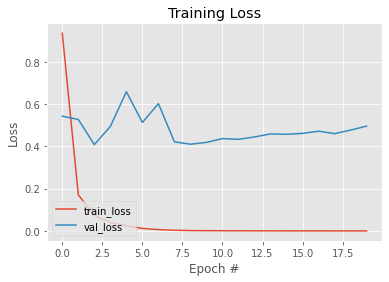

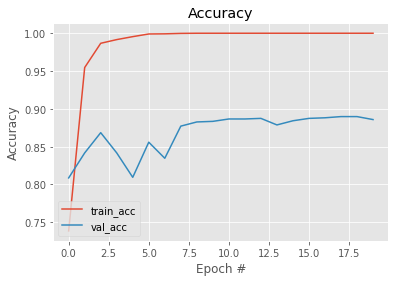

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 20), fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

plt.plot(np.arange(0, 20), fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), fit.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [19]:
print("Avg Val Acc: " + str(sum(fit.history["val_accuracy"])/20*100))
print("Avg Val Loss: " + str(sum(fit.history["val_loss"])/20*100))


Avg Val Acc: 86.8425190448761
Avg Val Loss: 47.973386347293854
